In [0]:
!pip install cupy-cuda100 -user

# Task 12. Histogram


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$
* Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.
* Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.
* Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.
* Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$
* Plot histogram. <strong>[Hint: how to represent the histogram](https://cdn.datamentor.io/wp-content/uploads/2017/11/r-histogram.png)</strong>

<strong >Hint about function $f(x)$ appearance:</strong>
    ![Hint](https://github.com/zakajd/HighPerformancePython/blob/master/img/misc/Hint.png?raw=1)

# Imports

In [2]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

# Wider cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Make sure folder for images exist
import os
# try:
#     os.mkdir('img/task12')
# except FileExistsError as err:
#     pass

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Autocompletion fix
# %config Completer.use_jedi=False

# T12.1 Function from the jupyter notebook is plotted with suggested number of points

In [3]:
@cp.fuse()
def z(x):
    return cp.sin(3*x) - 0.5

@cp.fuse()
def f(x):
    return (cp.power(z(x),2)+cp.power(z(x),3)-200*cp.power(z(x),4))*cp.sin(1e5*(x+0.5))

x = cp.linspace(0,1, int(1e7))
y = f(x)
f_min = y.min()
f_max = y.max()
delta = 0.1 * (f_max - f_min)
print('Min: {}. Max {}.'.format(f_min, f_max))

Min: -12.365544666168107. Max 12.374912294071224.


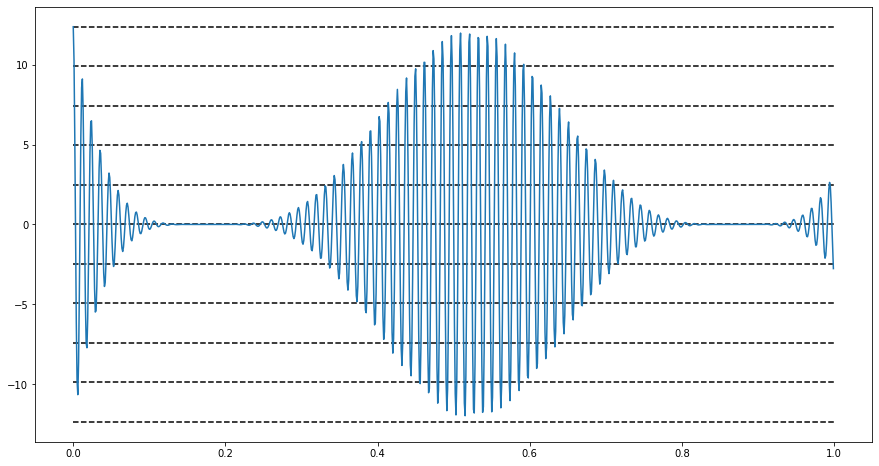

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(x.tolist()[::10000], y.tolist()[::10000]);
plt.hlines([np.float(f_min + i*delta) for i in range(11)], 0, 1, linestyles='dashed')

# T12.2 Plot Histogram

In [5]:
np_y = cp.asnumpy(y)
%timeit y[y>5]
%timeit np_y[np_y>5]

The slowest run took 856.76 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 1.16 ms per loop
100 loops, best of 3: 12.5 ms per loop


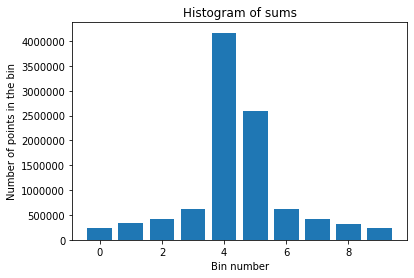

In [6]:
res = []
for i in range(10):
#     cp.logical_and((f_min + (i+1)*delta) > y, y > (f_min + i*delta))
    r = ((f_min + (i+1)*delta) > y) & (y > (f_min + i*delta))
    r = cp.sum(r)
    res.append(cp.asnumpy(r))
res = np.array(res)
plt.bar(np.arange(10),res)
plt.title('Histogram of sums')
plt.xlabel('Bin number')
plt.ylabel('Number of points in the bin');

# T12.3 Computation time of cp.sum() and np.sum() are provided
Only those two functions, no need to include plot drawing time into it

In [0]:
# select points in the interval
sub_y = ((f_min + delta) > y) & (y > f_min)
np_sub_y = cp.asnumpy(sub_y)

In [8]:
%timeit -n 100 cp.sum(sub_y)

100 loops, best of 3: 16.8 µs per loop


In [9]:
%timeit -n 100 np.sum(np_sub_y)

100 loops, best of 3: 10.2 ms per loop
